In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [3]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [4]:
samples<-read.csv(file='samplelist2.csv')

In [5]:
filenames4<-samples$X

In [6]:
filenames4<-gsub('X','',filenames4)

In [7]:
temp<-read.csv(filenames4[1],header=T)
temp
temp2<-temp[,c(1,8)]

X,circfind,CIRI,findcirc,circexp,sum,count,result
<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>
chr1_100011364_100017815_+,0,2,1,0,2,3,1.50
chr1_100049908_100061949_+,1,0,0,1,2,2,1.00
chr1_100049908_100069685_+,3,0,3,3,3,9,3.00
chr1_100059877_100068586_+,1,0,1,1,3,3,1.00
chr1_100136881_100140514_+,2,0,0,2,2,4,2.00
chr1_100436132_100462881_+,1,0,1,0,2,2,1.00
chr1_100494817_100499262_+,1,0,1,1,3,3,1.00
chr1_100906851_100921841_+,3,5,2,3,4,13,3.25
chr1_100906851_100965918_+,1,0,1,0,2,2,1.00


In [8]:
#count of single circRNA max: 1000

In [9]:
temp2$result<-round(temp2$result)
temp2<-temp2[which(temp2$result<1000),]
colnames(temp2)<-c("circRNA",filenames4[1])
data4 <- temp2

In [10]:
for (i in 2:28){
  temp<-read.csv(filenames4[i],header=T)
  temp
  temp2<-temp[,c(1,8)]
  temp2$result<-round(temp2$result)
  temp2<-temp2[which(temp2$result<1000),]
  colnames(temp2)<-c("circRNA",filenames4[i])
  data4 <- merge(data4,temp2,all=T)
}

In [11]:
data4[is.na(data4)]<-0
data4
write.csv(data4,file="0725_allmeancirc.csv")

circRNA,1Ca.csv,1N.csv,2534465Ca.csv,2534465N.csv,2537821Ca.csv,2537821N.csv,3Ca.csv,3N.csv,clean2393116Ca.csv,⋯,N6.csv,N7.csv,P4.csv,P5.csv,T4.csv,T5.csv,T6.csv,T7.csv,2Ca.csv,2N.csv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100007033_100017815_+,0,0,0,0,0,0,0,2,0,⋯,0,1,0,0,0,0,0,0,2,0
chr1_100007033_100043229_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chr1_100007033_100050004_+,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100011364_100017815_+,2,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,1,0,2,0
chr1_100015301_100017815_+,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100024108_100024325_+,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100061949_+,0,0,0,0,0,0,0,0,0,⋯,3,0,0,0,0,0,0,1,0,0
chr1_100043072_100068586_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
chr1_100043072_100078548_+,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
rownames(data4)<-data4$circRNA
data4$circRNA<-NULL

In [13]:
data4['chrX_140783174_140784659_+',]

,1Ca.csv,1N.csv,2534465Ca.csv,2534465N.csv,2537821Ca.csv,2537821N.csv,3Ca.csv,3N.csv,clean2393116Ca.csv,clean2393116N.csv,⋯,N6.csv,N7.csv,P4.csv,P5.csv,T4.csv,T5.csv,T6.csv,T7.csv,2Ca.csv,2N.csv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX_140783174_140784659_+,642,13,432,4,301,62,183,24,308,30,⋯,177,30,112,224,38,318,90,176,352,68


In [14]:
colnames(data4)

[1] "1Ca.csv"             "1N.csv"              "2534465Ca.csv"      
 [4] "2534465N.csv"        "2537821Ca.csv"       "2537821N.csv"       
 [7] "3Ca.csv"             "3N.csv"              "clean2393116Ca.csv" 
[10] "clean2393116N.csv"   "clean2518780Ca.csv"  "clean2518780N.csv"  
[13] "clean2520263Ca.csv"  "clean2520263N.csv"   "clean2523247Ca.csv" 
[16] "clean2523247N.csv"   "clean43540519Ca.csv" "clean43540519N.csv" 
[19] "N6.csv"              "N7.csv"              "P4.csv"             
[22] "P5.csv"              "T4.csv"              "T5.csv"             
[25] "T6.csv"              "T7.csv"              "2Ca.csv"            
[28] "2N.csv"

In [15]:
data5<-data4[,c(1,5,11,17,24,26,27,7,9,13,15,23,25,2,6,8,10,12,14,16,18,19,20,21,22,28)]

In [16]:
normal <- CreateSeuratObject(counts = data5, project = "normal",min.cells = 2)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [17]:
label<-samples$label

In [18]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
1Ca.csv,normal,30891,7428
2537821Ca.csv,normal,12736,4381
clean2518780Ca.csv,normal,19291,5830
clean43540519Ca.csv,normal,6532,2324
T5.csv,normal,14987,4881
T7.csv,normal,18788,5961
2Ca.csv,normal,21372,6075
3Ca.csv,normal,19337,5195
clean2393116Ca.csv,normal,12165,3595


In [19]:
normal@meta.data$label<-c(rep('type2',times=7),rep('type3',times=6),rep('normal',times=13))

In [20]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
1Ca.csv,normal,30891,7428,type2
2537821Ca.csv,normal,12736,4381,type2
clean2518780Ca.csv,normal,19291,5830,type2
clean43540519Ca.csv,normal,6532,2324,type2
T5.csv,normal,14987,4881,type2
T7.csv,normal,18788,5961,type2
2Ca.csv,normal,21372,6075,type2
3Ca.csv,normal,19337,5195,type3
clean2393116Ca.csv,normal,12165,3595,type3


In [21]:
options(repr.plot.height=6,repr.plot.width=7)

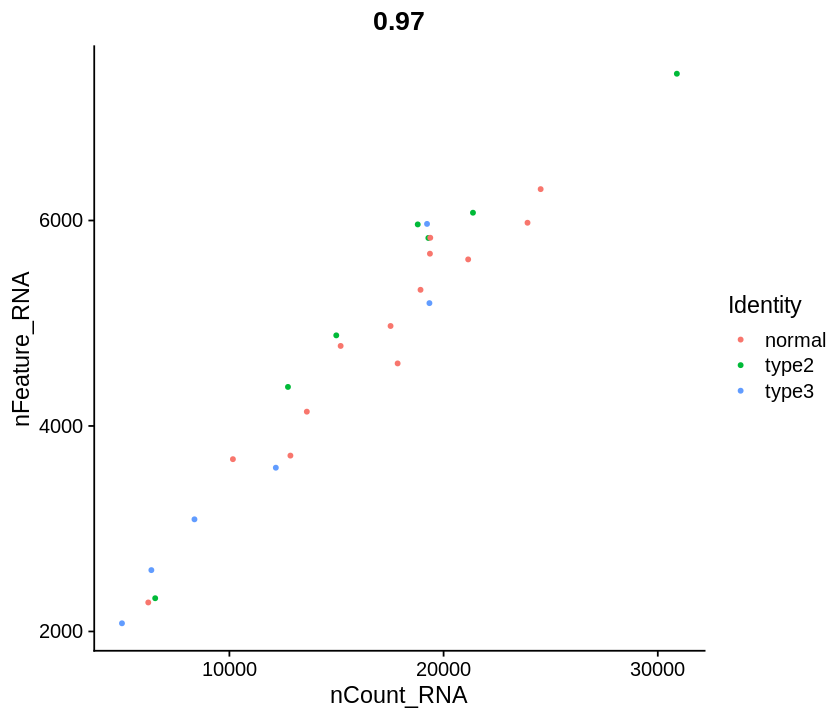

In [22]:
FeatureScatter(normal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",group.by='label')

In [23]:
normal

An object of class Seurat 
23277 features across 26 samples within 1 assay 
Active assay: RNA (23277 features, 0 variable features)

In [24]:
normal <- NormalizeData(normal, normalization.method = "LogNormalize")

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.1307”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.19283”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.1712e-30”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.031008”
When using repel, set xnudge and ynudge to 0 for optimal results



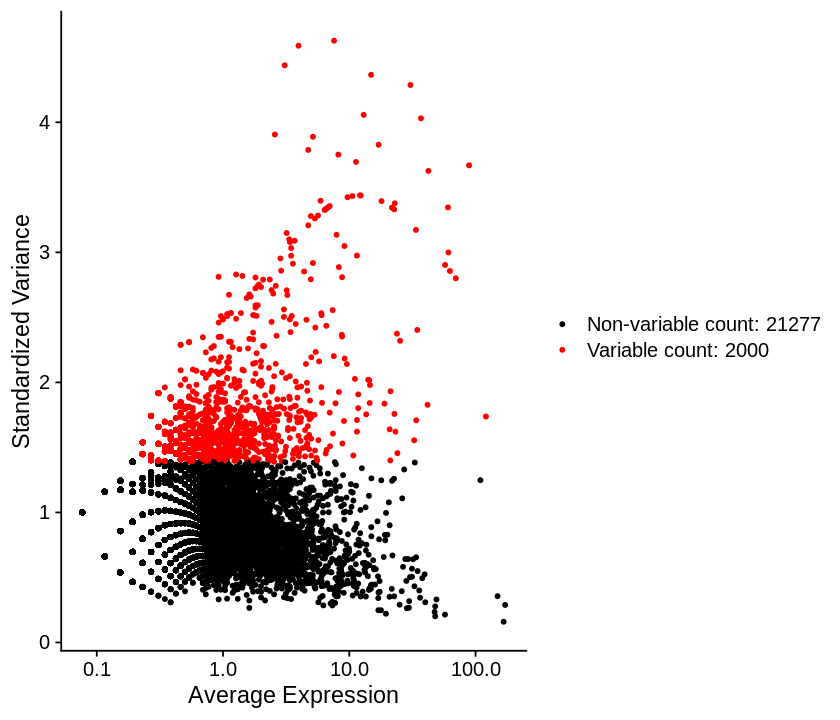

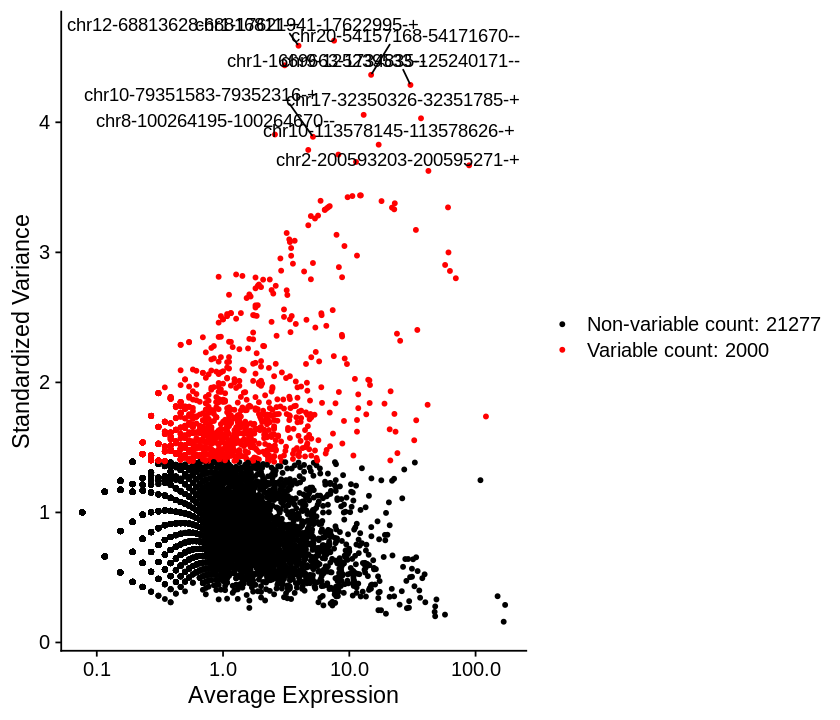

In [25]:
normal <- FindVariableFeatures(normal, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(normal), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(normal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [26]:
pdf("0806-scatter.pdf",width=7,height=6)
plot2
dev.off()

png 
  2

In [27]:
all.genes <- rownames(normal)
normal <- ScaleData(normal, features = all.genes)

Centering and scaling data matrix



In [28]:
normal <- RunPCA(normal, features = VariableFeatures(object = normal),npcs = 25)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  chr17-20204332-20205912-+, chr2-214767481-214781509--, chr8-141253988-141254629--, chr4-55403235-55417985-+, chr6-47283937-47286595--, chrX-85303405-85308216--, chr6-87215902-87218731-+, chr15-98707561-98708107-+, chr6-70475409-70502791-+, chr5-171183194-171205612-+ 
	   chr5-145796441-145826200--, chr2-108839184-108856970-+, chr3-142736378-142748460-+, chr12-95208842-95211267--, chr10-93381218-93389154--, chr14-33925617-33931215--, chr18-2890560-2892486-+, chr1-159918762-159920537--, chr2-8908620-8958642--, chr7-80789305-80805758-- 
	   chr11-6932093-6955782-+, chr1-31915894-31919658--, chr3-185533570-185535132--, chr2-215373321-215391814--, chr5-65451474-65473952--, chr1-86715723-86735179-+, chrX-148651998-148662768-+, chr2-69348170-69363670--, chr2-160123790-160126601--, chr6-17661652-17675770-- 
Negative:  chr

In [29]:
options(repr.plot.height=6,repr.plot.width=7)

In [30]:
pdf("0806-pca.pdf",width=7,height=6)
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2)
dev.off()

png 
  2

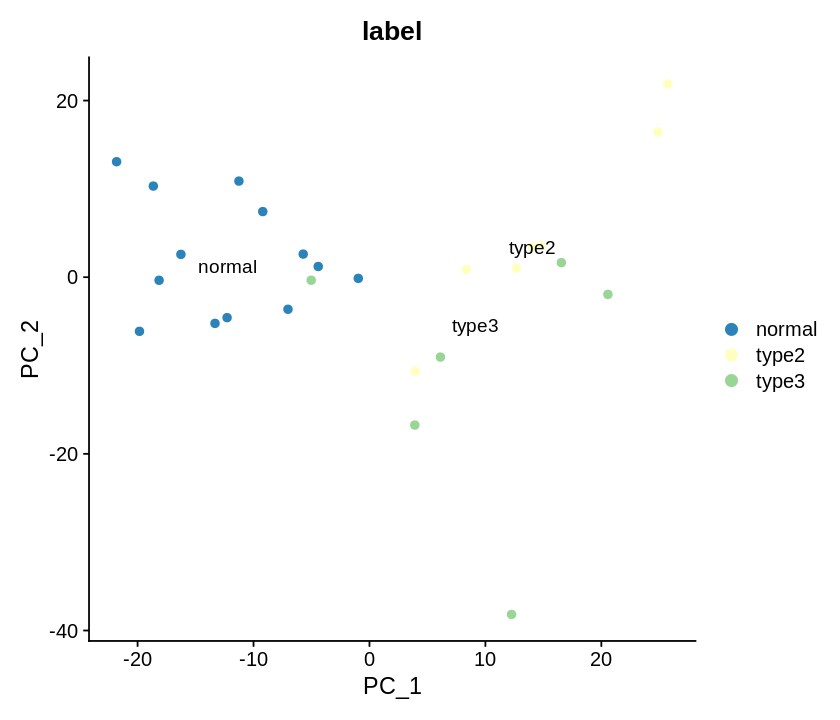

In [31]:
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2,cols=c('#2B83BA','#FFFFBF','#99D594'))

In [32]:
pdf("0707-pca-3group.pdf",width=7,height=6)
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2,cols=c('#2B83BA','#FFFFBF','#99D594'))
dev.off()

png 
  2

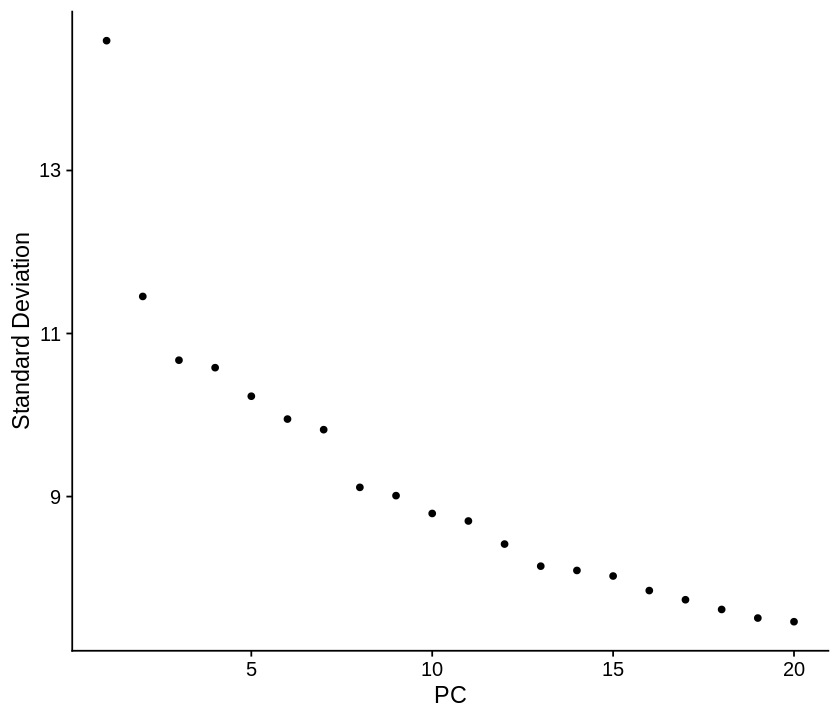

In [33]:
ElbowPlot(normal)

In [34]:
Idents(object = normal) <- "label"

In [35]:
normal3.markers <- FindAllMarkers(normal, only.pos = TRUE, test.use='DESeq2')
top100<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

Calculating cluster type2

Warning message:
“multiple methods tables found for ‘which’”
Warning message:
“multiple methods tables found for ‘which’”
converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Calculating cluster type3

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

Calculating cluster normal

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [36]:
top100<-as.data.frame(top100)
write.csv(top100,file="0806-top100diffcirc.csv")

In [37]:
options(repr.plot.height=10,repr.plot.width=10)

In [38]:
top50 <- normal3.markers %>% group_by(cluster) %>% top_n(n = 6, wt = avg_log2FC)
genedraw<-c(top50$gene,'chr1-113834909-113855049--','chr5-65451474-65473952--',"chrX-140783174-140784659-+")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



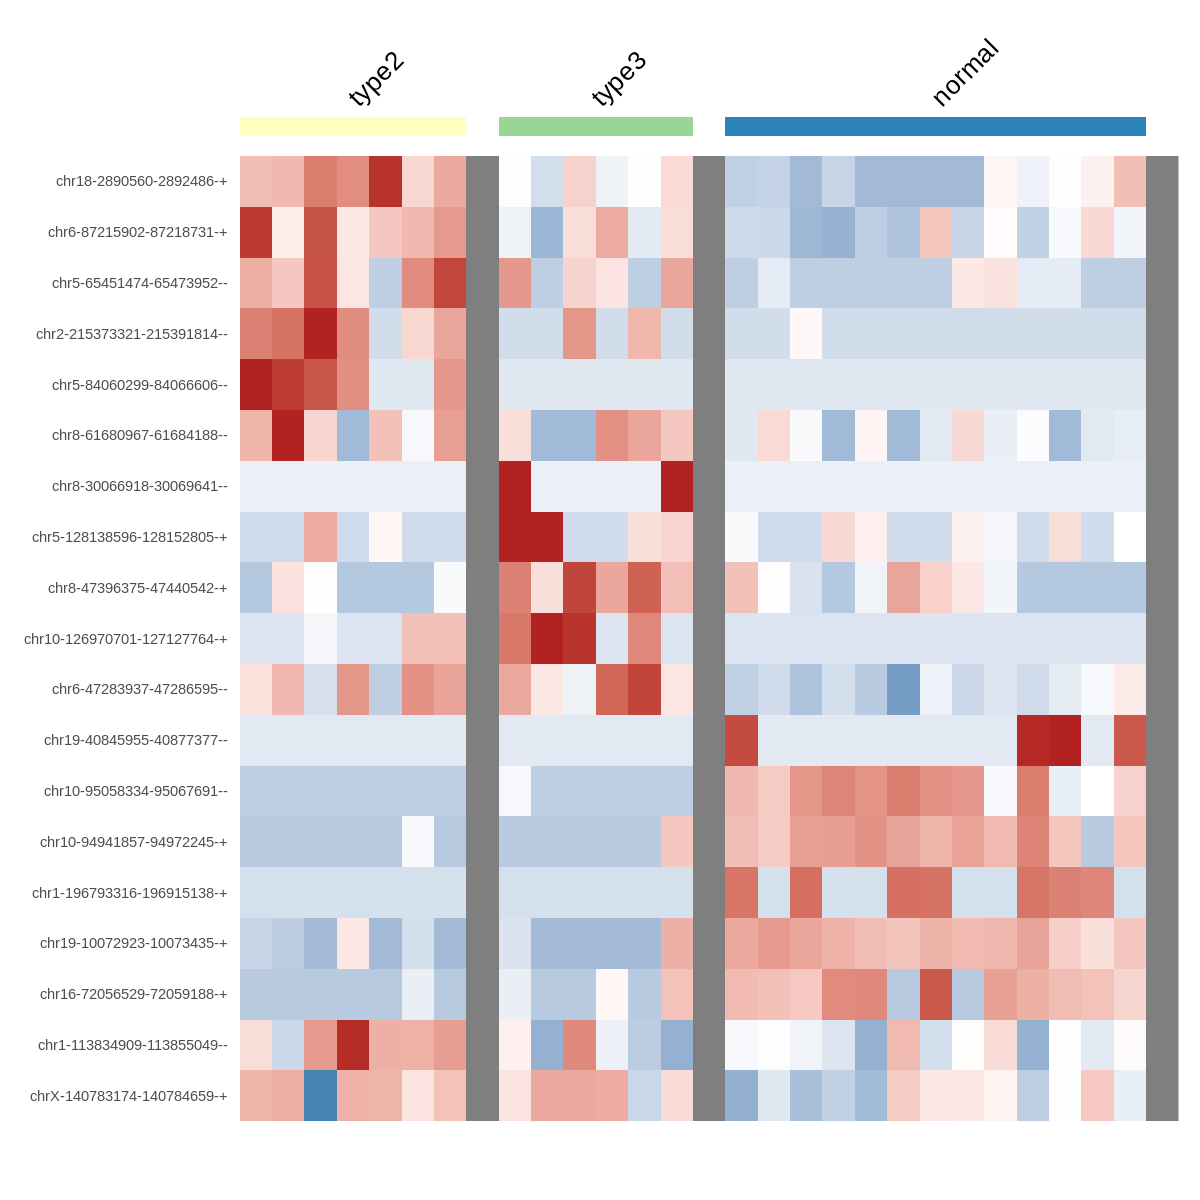

In [39]:
DoHeatmap(normal, features = genedraw,group.colors=c('#FFFFBF','#99D594','#2B83BA')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))

In [40]:
pdf('0805-heatmap3.pdf',width=7,height=6)
DoHeatmap(normal, features = genedraw,group.colors=c('#FFFFBF','#99D594','#2B83BA')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [41]:
save(normal,file="0806-seurat-30samples.Rda")

In [42]:
expr_df<-read.csv(file='circRNAannotation2.csv')

In [43]:
expr_df

X,gene_name,circRNA,strand
<int>,<chr>,<chr>,<chr>
1,SAMD11,chr1_935771_939412_+,+_+
2,NOC2L,chr1_955922_957273_-,-_-
3,AGRN,chr1_1035276_1041702_+,+_+
4,AGRN,chr1_1043238_1051815_+,+_+
5,AGRN,chr1_1047326_1050837_+,+_+
6,SDF4,chr1_1217376_1217686_-,-_-
7,SDF4,chr1_1218793_1223331_-,-_-
8,SDF4,chr1_1223243_1223968_-,-_-
9,B3GALT6,chr1_1233247_1233878_+,+_+


In [44]:
expr_df$X<-NULL

In [45]:
markers<-as.data.frame(top100)

In [46]:
markers$circRNA<-gsub('-','_',markers$gene)

In [47]:
markers$circRNA<-gsub('__','_-',markers$circRNA)

In [48]:
try<-merge(markers,expr_df,all=F)

In [49]:
try

circRNA,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,gene_name,strand
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>
chr1_113829591_113834439_-,1.274454e-04,1.910058,1.000,0.947,1.000000e+00,type2,chr1-113829591-113834439--,PTPN22,-_-
chr1_113834909_113855049_-,6.568723e-04,1.560867,1.000,0.789,1.000000e+00,type2,chr1-113834909-113855049--,PTPN22,-_-
chr1_119755426_119759989_-,6.965422e-11,3.313891,1.000,0.231,1.621341e-06,normal,chr1-119755426-119759989--,HMGCS2,-_-
chr1_12578717_12579412_-,1.769215e-04,1.771925,1.000,0.692,1.000000e+00,normal,chr1-12578717-12579412--,DHRS3,-_-
chr1_196793316_196915138_+,1.986938e-06,7.923442,0.538,0.000,4.624995e-02,normal,chr1-196793316-196915138-+,CFHR1,+_+
chr1_196793316_196915138_+,1.986938e-06,7.923442,0.538,0.000,4.624995e-02,normal,chr1-196793316-196915138-+,CFHR4,+_+
chr1_196793316_196915138_+,1.986938e-06,7.923442,0.538,0.000,4.624995e-02,normal,chr1-196793316-196915138-+,BX248415.1,+_+
chr1_196793316_196915138_+,1.986938e-06,7.923442,0.538,0.000,4.624995e-02,normal,chr1-196793316-196915138-+,CFHR3,+_+
chr1_213996468_214011715_+,1.042813e-03,2.189825,1.000,0.692,1.000000e+00,normal,chr1-213996468-214011715-+,PROX1,+_+


In [50]:
write.csv(try,file='0806.diffcircgene.csv',row.names=F)

In [51]:
exprMat<-GetAssayData(normal,slot="data")

In [52]:
exprMat<-as.data.frame(exprMat)

In [53]:
exprMatdiff<-exprMat[markers$gene,]

In [54]:
rownames(exprMatdiff)<-gsub('-','_',rownames(exprMatdiff))

In [55]:
rownames(exprMatdiff)<-gsub('__','_-',rownames(exprMatdiff))

In [56]:
write.csv(exprMatdiff,file='0806.top100diff.csv')

In [57]:
save(normal,file='0806-seurat-type2type3.Rda')

In [58]:
top100can<-top100[which(top100$cluster=="type2"),]

In [59]:
top100can

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,3.234079e-07,2.283472,1.000,0.737,0.007527965,type2,chr18-2890560-2892486-+
2,1.933865e-06,2.249889,1.000,1.000,0.045014579,type2,chr6-87215902-87218731-+
3,8.789074e-05,2.118644,1.000,0.263,1.000000000,type2,chr9-134690911-134701333-+
4,1.274454e-04,1.910058,1.000,0.947,1.000000000,type2,chr1-113829591-113834439--
5,6.419236e-04,1.719549,1.000,0.947,1.000000000,type2,chr3-146121111-146124229--
6,6.568723e-04,1.560867,1.000,0.789,1.000000000,type2,chr1-113834909-113855049--
7,7.879866e-04,1.891234,1.000,0.263,1.000000000,type2,chr19-18175039-18175697-+
8,8.067415e-04,2.170483,0.857,0.474,1.000000000,type2,chr5-65451474-65473952--
9,8.206090e-04,2.900004,0.857,0.158,1.000000000,type2,chr2-215373321-215391814--


In [60]:
write.csv(top100can,file='0806.top100can.type2specific.csv')

In [61]:
expmat4<-as.data.frame(t(exprMat))

In [62]:
expmat4$sample<-rownames(expmat4)

In [63]:
expmat4$sample

[1] "1Ca.csv"             "2537821Ca.csv"       "clean2518780Ca.csv" 
 [4] "clean43540519Ca.csv" "T5.csv"              "T7.csv"             
 [7] "2Ca.csv"             "3Ca.csv"             "clean2393116Ca.csv" 
[10] "clean2520263Ca.csv"  "clean2523247Ca.csv"  "T4.csv"             
[13] "T6.csv"              "1N.csv"              "2537821N.csv"       
[16] "3N.csv"              "clean2393116N.csv"   "clean2518780N.csv"  
[19] "clean2520263N.csv"   "clean2523247N.csv"   "clean43540519N.csv" 
[22] "N6.csv"              "N7.csv"              "P4.csv"             
[25] "P5.csv"              "2N.csv"

In [64]:
expmat4$group<-normal@meta.data$label

In [65]:
options(repr.plot.height=5,repr.plot.width=3)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




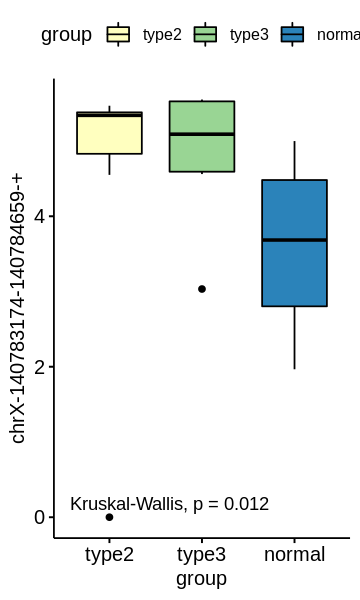

In [66]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chrX-140783174-140784659-+", fill = "group",palette =c('#FFFFBF','#99D594','#2B83BA'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chrX−140783174−140784659−+.pdf',height=5,width=3)

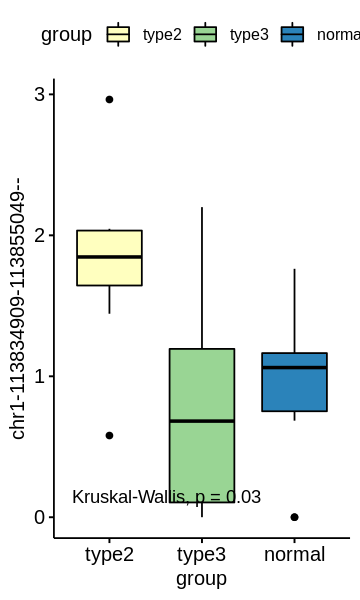

In [67]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr1-113834909-113855049--", fill = "group",palette =c('#FFFFBF','#99D594','#2B83BA'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr1-113834909-113855049--.pdf',height=5,width=3)

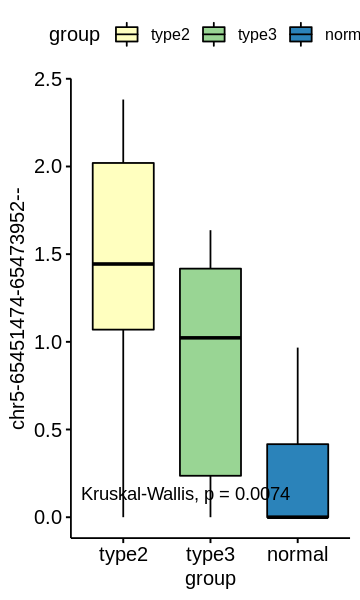

In [78]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr5-65451474-65473952--", fill = "group",palette =c('#FFFFBF','#99D594','#2B83BA'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('0717-chr5-65451474-65473952--.pdf',height=5,width=3)

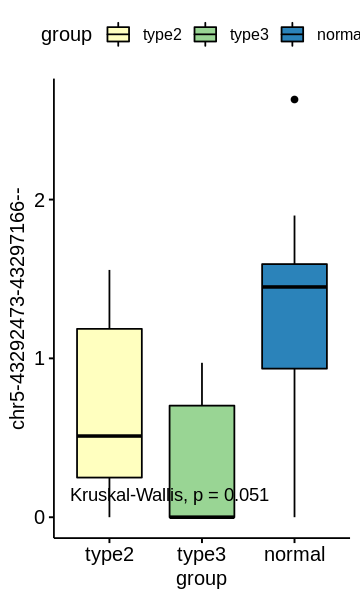

In [79]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr5-43292473-43297166--", fill = "group",palette =c('#FFFFBF','#99D594','#2B83BA'))+
    stat_compare_means(label.y = 0.1)
p
#ggsave('0717-chr5-65451474-65473952--.pdf',height=5,width=3)

In [69]:
exprMat[c('chr5-65451474-65473952--','chr1-113834909-113855049--','chrX-140783174-140784659-+'),]

,1Ca.csv,2537821Ca.csv,clean2518780Ca.csv,clean43540519Ca.csv,T5.csv,T7.csv,2Ca.csv,3Ca.csv,clean2393116Ca.csv,clean2520263Ca.csv,⋯,clean2393116N.csv,clean2518780N.csv,clean2520263N.csv,clean2523247N.csv,clean43540519N.csv,N6.csv,N7.csv,P4.csv,P5.csv,2N.csv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5-65451474-65473952--,1.443900,1.2106090,2.283647,0.9285847,0.000000,1.756183,2.381945,1.636498,0.000000,1.100616,⋯,0.0000000,0.00000,0.000000,0.000000,0.9038003,0.9673092,0.4163713,0.4241859,0.000000,0.000000
chr1-113834909-113855049--,1.443900,0.5795169,2.046259,2.9637821,1.846557,1.844122,2.021631,1.276958,0.000000,2.199896,⋯,0.7516275,0.00000,1.762641,0.684998,1.1642290,1.4496709,0.0000000,1.1357099,0.839788,1.188512
chrX-140783174-140784659-+,5.341509,5.4694850,0.000000,5.4002111,5.362155,4.550469,5.110188,4.560562,5.538064,5.552069,⋯,2.8795761,2.25762,4.960154,4.516412,4.4819127,4.2927222,2.8029644,4.0972524,4.999764,3.683799


In [70]:
M<-exprMat[c('chr5-65451474-65473952--','chr1-113834909-113855049--','chrX-140783174-140784659-+'),]

In [71]:
write.csv(M,file='0808-type323normal-circRNA.csv')

In [72]:
genedraw<-gsub('-','_',genedraw)

In [73]:
genedraw<-gsub('__','_-',genedraw)

In [74]:
genedraw<-as.data.frame(genedraw)
colnames(genedraw)<-'circRNA'

In [75]:
merge(expr_df,genedraw)

circRNA,gene_name,strand
<chr>,<chr>,<chr>
chr1_113834909_113855049_-,PTPN22,-_-
chr1_196793316_196915138_+,CFHR1,+_+
chr1_196793316_196915138_+,BX248415.1,+_+
chr1_196793316_196915138_+,CFHR4,+_+
chr1_196793316_196915138_+,CFHR3,+_+
chr10_126970701_127127764_+,DOCK1,+_+
chr10_94941857_94972245_+,CYP2C9,+_+
chr10_95058334_95067691_-,CYP2C8,-_-
chr16_72056529_72059188_+,TXNL4B,+_-


In [76]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
1Ca.csv,normal,30891,7428,type2
2537821Ca.csv,normal,12736,4381,type2
clean2518780Ca.csv,normal,19291,5830,type2
clean43540519Ca.csv,normal,6532,2324,type2
T5.csv,normal,14987,4881,type2
T7.csv,normal,18788,5961,type2
2Ca.csv,normal,21372,6075,type2
3Ca.csv,normal,19337,5195,type3
clean2393116Ca.csv,normal,12165,3595,type3
